_**Group Members:**_

Haoyang Ma

## Part 1: The Cost Volume

In [1]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='spring24', homework=4):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [2]:
import skimage.io as io


file_names = ['hand0.pgm', 'hand1.pgm']
for file_name in file_names:
    retrieve(file_name)
frames = [io.imread(file_name) for file_name in file_names]

Using previously downloaded file hand0.pgm
Using previously downloaded file hand1.pgm


### Problem 1.1

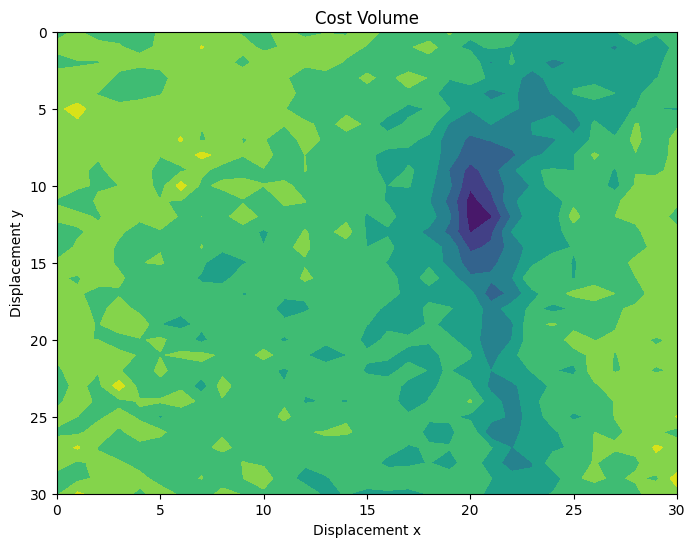

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# compute gaussian weights
def compute_gaussian_weights(n, sigma):
    h = (n - 1) // 2
    x, y = np.meshgrid(np.arange(-h, h+1), np.arange(-h, h+1))
    weights = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return weights / weights.sum()

# compute cost volume
def compute_cost_volume(f, g, xf, R, n, sigma):
    h = (n - 1) // 2
    weights = compute_gaussian_weights(n, sigma)
    cost_volume = np.zeros((R[1] - R[0] + 1, R[1] - R[0] + 1))

    for dy in range(R[0], R[1]+1):
        for dx in range(R[0], R[1]+1):
            shifted_g = np.roll(g, (dy, dx), axis=(0, 1))
            diff = (shifted_g - f)**2
            weighted_diff = diff[(xf[0]-h):(xf[0]+h+1), (xf[1]-h):(xf[1]+h+1)] * weights
            cost_volume[dy-R[0], dx-R[0]] = np.sum(weighted_diff[0:21, 0:21])

    return cost_volume

# plot cost volume
def plot_cost_volume(cost_volume):
    plt.figure(figsize=(8, 6))
    plt.contourf(cost_volume, cmap='viridis')
    plt.title('Cost Volume')
    plt.xlabel('Displacement x')
    plt.ylabel('Displacement y')
    plt.gca().invert_yaxis()  # y axis is flipped to match the image coordinate system
    plt.show()

# set parameters
n = 21
sigma = 5
xf = (135, 145)
R = (-15, 15)

# compute cost volume
cost_volume = compute_cost_volume(frames[0], frames[1], xf, R, n, sigma)

# plot_cost_volume(cost_volume)
plot_cost_volume(cost_volume)


## Part 2: Camera Transformations

### Problem 2.1 (Exam Style)

Firstly, a world point $p$ expressed in camera a coordinates as $p_a$ , expressed in camera
b coordinates as $p_b$.

Given $t_a$, $t_b$, $R_a$, $R_b$, we can obtain:

$$ \begin{cases} p_a = R_a(p - t_a)
\\p_b = R_b(p - t_b)
\end{cases}
  \Rightarrow p_b = R_b(R_a^T p_a + t_a - t_b) \Rightarrow p_b = R_b R_a^T (p_a - R_a(t_b - t_a)) $$

Therefore, we get

$$ R = R_b R_a^T = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ -1 & 0 & 0 \end{bmatrix} $$

$$ t = R_a(t_b - t_a) = \begin{bmatrix} 1 \\ 0 \\ \sqrt{3} \end{bmatrix} $$

Then we can obtain:

$$ [t]_\times = \begin{bmatrix} 0 & -\sqrt{3} & 0 \\ \sqrt{3} & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix} $$

Finally, we get the $E$:

$$ E = R[t]_\times = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ -1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 0 & -\sqrt{3} & 0 \\ \sqrt{3} & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ \sqrt{3} & 0 & -1 \\ 0 & \sqrt{3} & 0 \end{bmatrix} $$

## Part 3: Epipolar Geometry 

### Problem 3.1 (Exam Style)

By applying SVD to the matrix $E$, we get the follwoing equation：
$$E = \begin{bmatrix} 1 & 0 & -1 \\ 0 & 0 & 0 \\ 1 & 0 & 1 \end{bmatrix} = U\Sigma^2V^T$$

and where $$V = \begin{bmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 \\ 0 & 0 & 1 \\ -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 \end{bmatrix}$$

Therefore, the last column of $V$ is $\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$.

Then, we can get：

$$t_1 = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix},t_2 = \begin{bmatrix} 0 \\ -1 \\ 0 \end{bmatrix}$$


### Problem 3.2 (Exam Style)

We choose the vector $t_1$ as $t$, so $t = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$. Then we can get the $[t]_x$：
$$[t]_x = \begin{bmatrix} 0 & 0 & -1 \\ 0 & 0 & 0 \\ -1 & 0 & 1 \end{bmatrix}$$

Then we calculate the $F$:
$$ F = E[t]^T_{\times} = \begin{bmatrix} -1 & 0 & -1 \\ 0 & 0 & 0 \\ 1 & 0 & -1 \end{bmatrix} $$

After applying SVD to $F$，we can get：
$$ U_F = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

$$ V_F = \begin{bmatrix} -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 \\ 0 & 0 & 1 \\ -\frac{\sqrt{2}}{2} & 
-\frac{\sqrt{2}}{2} & 0 \end{bmatrix} $$

Then we can obtain $Q$:
$$ Q = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} \begin{bmatrix} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{bmatrix}
 + \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \begin{bmatrix} \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{bmatrix}
 + \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} \begin{bmatrix} 0 & 1 & 1 \end{bmatrix}
 = \begin{bmatrix} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \\ 
 0 & 1 & 0 \\ 
 \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{bmatrix} $$

 Therefore, we obtain
 $$
 R=Q=\begin{bmatrix} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \\ 
 0 & 1 & 0 \\ 
 \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{bmatrix}
 $$





### Problem 3.3 (Exam Style)


Fristly, we use $t = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$ and $R = \begin{bmatrix} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \\ 0 & 1 & 0 \\ \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{bmatrix}$.

We use $p_a = R^Tp_b + t$ to express $b$ and the projection center of camera b(denote it as $\phantom{}^{a}O_b$) in the camera $a$ coordinates.

$$\phantom{}^{a}b = \left[ \begin{array}{ccc} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \\ 0 & 1 & 0 \\ \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{array} \right] \left[ \begin{array}{c} 3 \\ 2 \\ 1 \end{array} \right] + \left[ \begin{array}{c} 0 \\ 1 \\ 0 \end{array} \right] = \left[ \begin{array}{c} -\sqrt{2} \\ 3 \\ -2\sqrt{2} \end{array} \right]$$

$$\phantom{}^{a}O_b = \left[ \begin{array}{ccc} -\frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \\ 0 & 1 & 0 \\ \frac{\sqrt{2}}{2} & 0 & -\frac{\sqrt{2}}{2} \end{array} \right] \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right] + \left[ \begin{array}{c} 0 \\ 1 \\ 0 \end{array} \right] = \left[ \begin{array}{c} 0 \\ 1 \\ 0 \end{array} \right]$$


We also can get the projection center of camera a (denote it as $\phantom{}^{a}O_a$) to determine the epipolar plane: 

$$\phantom{}^{a}O_a = \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right]$$

Denote the unit normal vector of epipolar plane as , we obtain:

$$\begin{cases}\phantom{}^{a}b^T n = 0\\
\phantom{}^{a}O_b^T n = 0 \end{cases} \Rightarrow n = \left[ \begin{array}{c} \frac{2}{\sqrt{5}} \\ 0 \\ -\frac{1}{\sqrt{5}} \end{array} \right]$$

Thus, the equation of epipolar plane is $2x - z = 0$.

Then, we take the intersection of epipolar plane and image plane ($z = 1$), then we get $x = \frac{1}{2}$。

Finally, we obtain that $x_1 = \frac{1}{2}$，$x_2 \in \mathbb{R}$

## Part 4: Epipolar Lines in Python

### Problem 4.1

In [4]:
import pickle


file_name = 'test_cases.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    test_cases = pickle.load(file)

Using previously downloaded file test_cases.pkl


In [5]:
def camera_frame():
    x_frame = np.array((-1, 1, 1, -1, -1)) / 2
    y_frame = np.array((-1, -1, 1, 1, -1)) / 2
    plt.plot(x_frame, y_frame, lw=1.5, c='gray')
    plt.axhline(0, lw=0.25, c='gray')
    plt.axvline(0, lw=0.25, c='gray')
    plt.axis('square')
    plt.axis('off')
    epsilon = 0.005
    half = 1/2 + epsilon
    plt.xlim(-half, half)
    plt.ylim(half, -half)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def show_images(s):
    # Extract translation, rotation, points, and camera from the scenario dictionary
    translation = s.translation
    rotation = s.rotation
    points = s.points
    camera = s.camera

    # Calculate the essential matrix E
    t_x = np.array([[0, -translation[2], translation[1]],
                  [translation[2], 0, -translation[0]],
                  [-translation[1], translation[0], 0]])
    
    E = np.dot(rotation, t_x)

    # Print rotation, translation, and essential matrix
    print("Rotation Matrix (R):")
    print(np.array2string(rotation, precision=4, separator=', '))
    print("\nTranslation Vector (t):")
    print(np.array2string(translation, precision=4, separator=', '))
    if camera == 2:
        print("\nEssential Matrix (E):")
        print(np.array2string(E, precision=4, separator=', '))
    else:
        print("\nEssential Matrix (E):")
        print(np.array2string(E.T, precision=4, separator=', '))

    # Set up the plot
    plt.subplot(1, 2, 1)

    # Draw points in the first image
    plt.title(f'Camera {camera}')
    colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k']
    for i, point in enumerate(points):
        plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
        camera_frame()

    # Draw epipolar lines in the second image
    plt.subplot(1, 2, 2)
    plt.title(f'Camera {3 - camera}')
    for i, point in enumerate(points):
        # Convert 2D point to 3D
        point_3d = np.array([point[0], point[1], 1])
        
        # Calculate the epipolar line
        if camera == 1:
            epipolar_line = np.dot(E.T, point_3d)
        else:
            epipolar_line = np.dot(E, point_3d)
        
        # Draw the epipolar line
        draw_line(epipolar_line, colors[i % len(colors)])

    plt.show()

def draw_line(line, color):
    # Find two points on the line that are outside the viewing rectangle
    n = line[:2] / np.sqrt(line[0]**2 + line[1]**2)
    c = -line[2] / np.sqrt(line[0]**2 + line[1]**2)
    if c < 0:
        c = -c
        n = -n
    q0 = c * n
    p = np.array([n[1], -n[0]])
    q1 = q0 - p
    q2 = q0 + p

    # Draw the line segment between the two points
    plt.plot([q1[0], q2[0]], [q1[1], q2[1]], color=color, lw=1.5)
    camera_frame()
    



In [7]:
test_cases[6].translation

array([0.2, 0.1, 0.5])


Test Case 0:
Rotation Matrix (R):
[[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]]

Translation Vector (t):
[0.2, 0. , 0.5]

Essential Matrix (E):
[[ 0. ,  0.5,  0. ],
 [-0.5,  0. ,  0.2],
 [ 0. , -0.2,  0. ]]


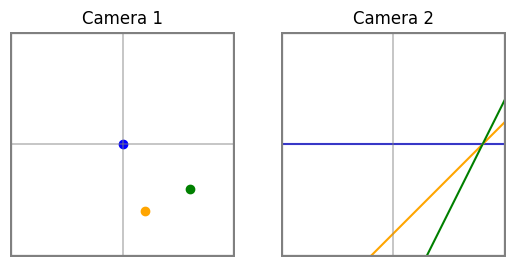


Test Case 1:
Rotation Matrix (R):
[[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]]

Translation Vector (t):
[0.2, 0. , 0.5]

Essential Matrix (E):
[[ 0. , -0.5,  0. ],
 [ 0.5,  0. , -0.2],
 [ 0. ,  0.2,  0. ]]


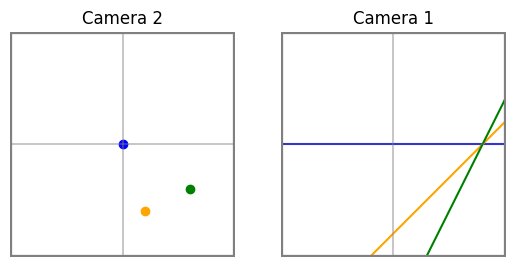


Test Case 2:
Rotation Matrix (R):
[[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]]

Translation Vector (t):
[1., 0., 0.]

Essential Matrix (E):
[[ 0.,  0.,  0.],
 [ 0.,  0., -1.],
 [ 0.,  1.,  0.]]


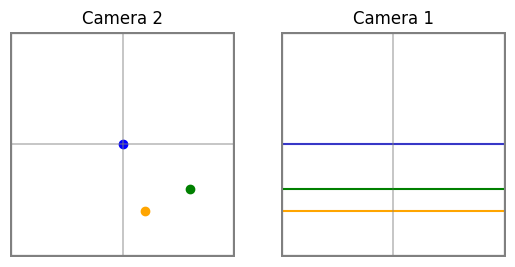


Test Case 3:
Rotation Matrix (R):
[[ 0.866,  0.   ,  0.5  ],
 [ 0.   ,  1.   ,  0.   ],
 [-0.5  ,  0.   ,  0.866]]

Translation Vector (t):
[0.2, 0. , 0.5]

Essential Matrix (E):
[[ 0.    ,  0.5   ,  0.    ],
 [-0.333 ,  0.    ,  0.4232],
 [ 0.    , -0.2   ,  0.    ]]


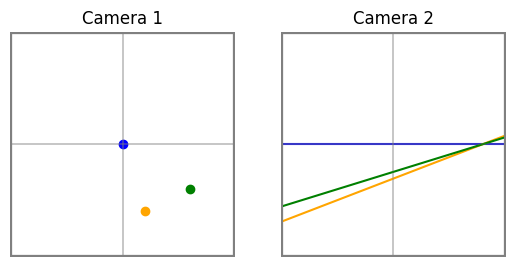


Test Case 4:
Rotation Matrix (R):
[[ 0.866, -0.5  ,  0.   ],
 [ 0.5  ,  0.866,  0.   ],
 [ 0.   ,  0.   ,  1.   ]]

Translation Vector (t):
[0.2, 0. , 0.5]

Essential Matrix (E):
[[-0.25  ,  0.433 ,  0.    ],
 [-0.433 , -0.25  ,  0.2   ],
 [ 0.1   , -0.1732,  0.    ]]


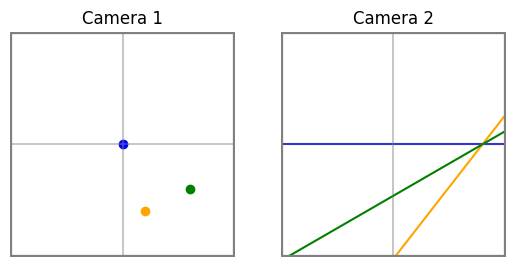


Test Case 5:
Rotation Matrix (R):
[[-0.6749, -0.7019, -0.2275],
 [ 0.5356, -0.6781,  0.5033],
 [-0.5076,  0.2178,  0.8336]]

Translation Vector (t):
[0.2, 0.1, 0.5]

Essential Matrix (E):
[[-0.3282,  0.292 ,  0.0729],
 [-0.3894, -0.1671,  0.1892],
 [ 0.0256,  0.4205, -0.0943]]


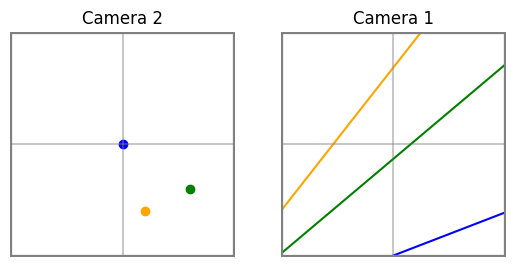


Test Case 6:
Rotation Matrix (R):
[[-0.6749,  0.5356, -0.5076],
 [-0.7019, -0.6781,  0.2178],
 [-0.2275,  0.5033,  0.8336]]

Translation Vector (t):
[0.2, 0.1, 0.5]

Essential Matrix (E):
[[ 0.3186, -0.3608,  0.1683],
 [ 0.236 ,  0.3945,  0.2805],
 [-0.1746,  0.0654, -0.1234]]


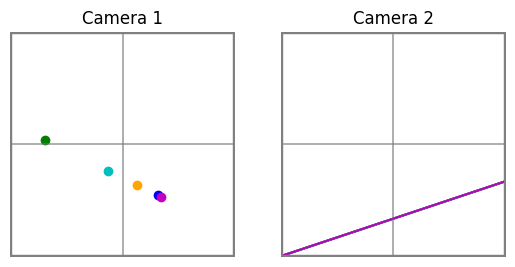

In [8]:

# Run the test cases
for i, test_case in enumerate(test_cases):
    print(f"\nTest Case {i}:")
    show_images(test_case)
    

### Problem 4.2 (Exam Style)

Test case 2

When the translation vector (t) of two cameras is parallel to the rotation axis generated by the rotation matrix (R), the epipolar lines will be arranged parallel to each other on the image plane of the other camera. This is because all epipolar lines pass through the epipole, and in this case, the epipole is at infinity, meaning that the epipolar lines are parallel.

Most general condition: For the epipolar lines to be distinct and parallel in both images, it is necessary for the translation vector t to be nonzero and not collinear with the rotation axis of any camera. This ensures that the epipole is at infinity, and therefore, all the epipolar lines are parallel.

### Problem 4.3 (Exam Style)

Test case 6

The situation where two points share the same epipolar line occurs when the projection points of these two points in one camera view, the center of the other camera, and the two points themselves, are collinear. In simpler terms, if from the perspective of the second camera, these two points in the world space and the center point of the first camera are on the same straight line, then their corresponding epipolar lines in the image of the first camera will coincide.